# CS 7641 Assignment 1: Supervised Learning

In [669]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
import time
from sklearn.neural_network import MLPClassifier



In [282]:
def splitData(dataX, dataY, percentage):
    dataXTrain, dataXTest, dataYTrain, dataYTest = train_test_split(
        dataX,dataY, test_size=percentage, random_state=0)
    return dataXTrain, dataXTest, dataYTrain, dataYTest

In [538]:
#this entire function is from sklearn library with a small tweaked
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,scoring=None,train_sizes=np.linspace(0.1, 1.0, 5),):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title("Learing Curve " + type(estimator).__name__+ "\n" + title )
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,scoring=scoring,cv=cv,n_jobs=n_jobs,
                                                                          train_sizes=train_sizes,return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print(test_scores_mean[-1])

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes,train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std,alpha=0.1,color="r",)
    axes[0].fill_between(train_sizes,test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std,alpha=0.1,color="g",)
    axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(train_sizes,fit_times_mean - fit_times_std,fit_times_mean + fit_times_std,alpha=0.1,)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(fit_time_sorted,test_scores_mean_sorted - test_scores_std_sorted,test_scores_mean_sorted + test_scores_std_sorted,alpha=0.1,)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [577]:
def gridSearch(x,y,model,parameter, nfolds,scoring='accuracy'):
    #create a dictionary of all values we want to test
    param_grid = parameter
    # decision tree model
    #use gridsearch to test all values
    grid = GridSearchCV(model, param_grid, cv=nfolds,scoring=scoring)
    #fit model to data
    grid.fit(x, y)
    return grid

In [479]:
def estimateScore(estimator, xTrain,yTrain,xTest,yTest, name):
    if not(type(estimator) is KNeighborsClassifier):
        clf = estimator.set_params(random_state=0)
    
    start = time.time()
    clf = estimator.fit(xTrain,yTrain)
    end = time.time()
    fit = end-start
    
    y_predTrain = clf.predict(xTrain)
    
    start = time.time()
    y_predTest = estimator.predict(xTest)
    end = time.time()
    pred = end - start
    
    model_name = type(estimator).__name__
    scoreTrain = accuracy_score(y_predTrain, yTrain )
    scoreTest = accuracy_score(y_predTest, yTest)
    
    print("Result from "+ model_name +" for "+name+":")
    print("Train Accuracy:", scoreTrain)
    print("Test Accuracy:", scoreTest)
    print("Time to fit for: " +str(fit))
    print("Time to predict for: " + str(pred))


    

In [606]:
def val_curve(estimator, x, y, param_name, param_range,  cv=5, scoring="accuracy", ):
    train, test = validation_curve(estimator, x, y, param_name = param_name, param_range = param_range,  cv=cv, scoring=scoring)
    trainMean = np.mean(train, axis=1)
    trainStd = np.std(train, axis=1)
    testMean = np.mean(test, axis=1)
    testStd = np.std(test, axis=1)
    return trainMean, trainStd, testMean, testStd

def plot_val_curve(param_name, param_range,trainMean,trainStd, testMean, testStd,log =False):


    fig , axes = plt.subplots(1,1 ,figsize=(10, 5))

    axes.fill_between(param_range,testMean - testStd,testMean + testStd,alpha=0.1,color="g")
    axes.plot( param_range, testMean, "o-",color="g", label="Cross-validation score")

    axes.fill_between(param_range,trainMean - trainStd,trainMean + trainStd,alpha=0.1,color="r")
    axes.plot( param_range, trainMean, "o-",color="r", label="training score")

    axes.set_xlabel(param_name)
    if log:
         axes.set_xscale('log')

    axes.set_ylabel("Score")
    axes.set_title("validation curve " +"for "+param_name)
    axes.legend(loc="best")
    return plt


    
    

In [481]:
spamHeader = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 
'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 
'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 
'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 
'meeting', 'original', 'project', 're', 'edu', 'table', 'conference', ';', '(', '[', '!', '$', '#', 'average', 'longest', 'total' , 'spam' ]

wine = pd.read_csv("data/wine/winequality-white.csv" , sep=';')
spam = pd.read_csv("data/spam/spambase.data", header=None, names=spamHeader)

wineHeader = wine[:-1].columns

In [482]:
wineHeader

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

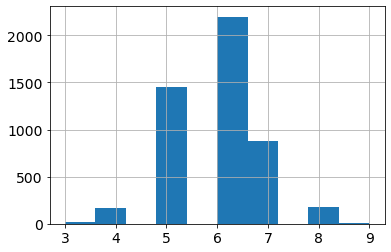

In [483]:
conditions = [
    (wine['quality'] <= 6),
    (wine['quality'] > 6) 
    ]
values = [0, 1]
wine['good_quality'] = np.select(conditions, values)
wine['quality'].hist()

wineY = wine['good_quality']
wineX = wine.drop(columns=['good_quality','quality'])


C:\Users\Luan\AppData\Local\Temp/ipykernel_3140/568640623.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  wine.hist(ax = axe)
C:\Users\Luan\AppData\Local\Temp/ipykernel_3140/568640623.py:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  spam.hist(ax = axe,density = True)


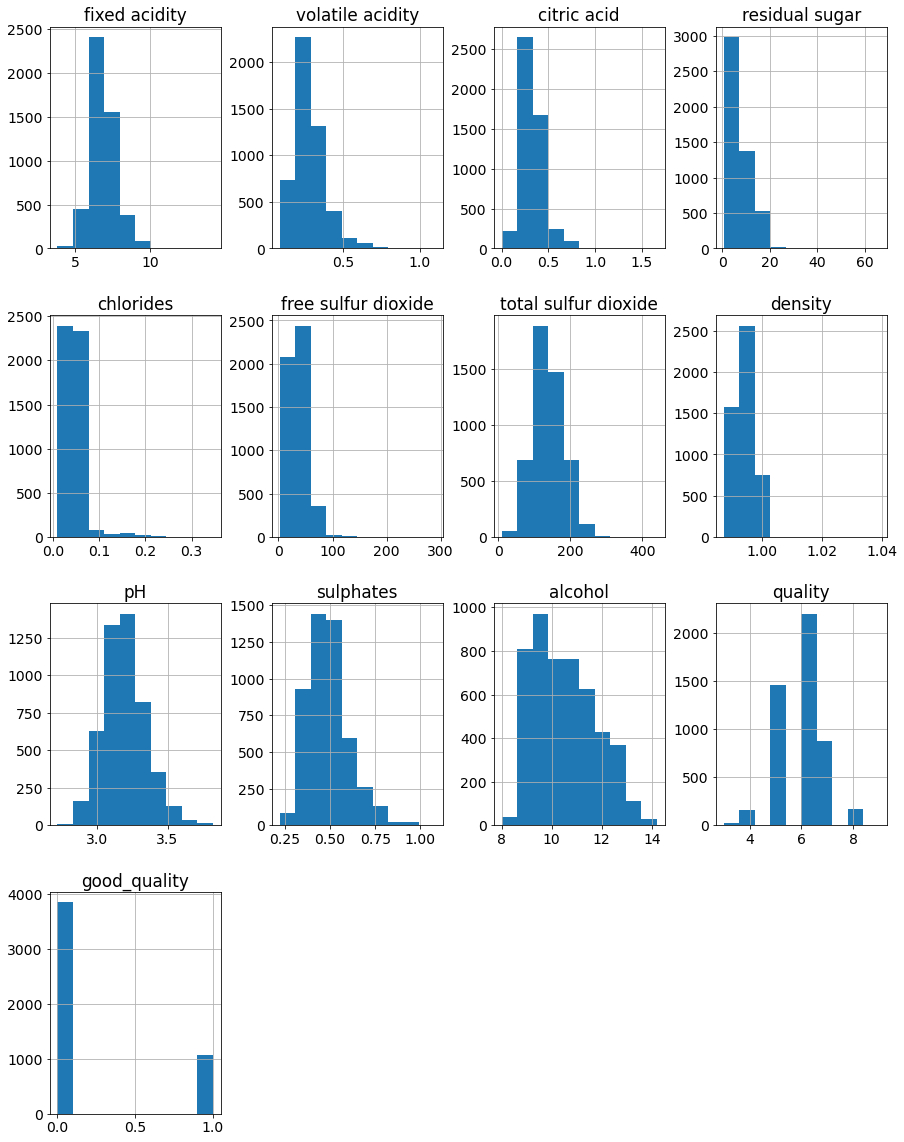

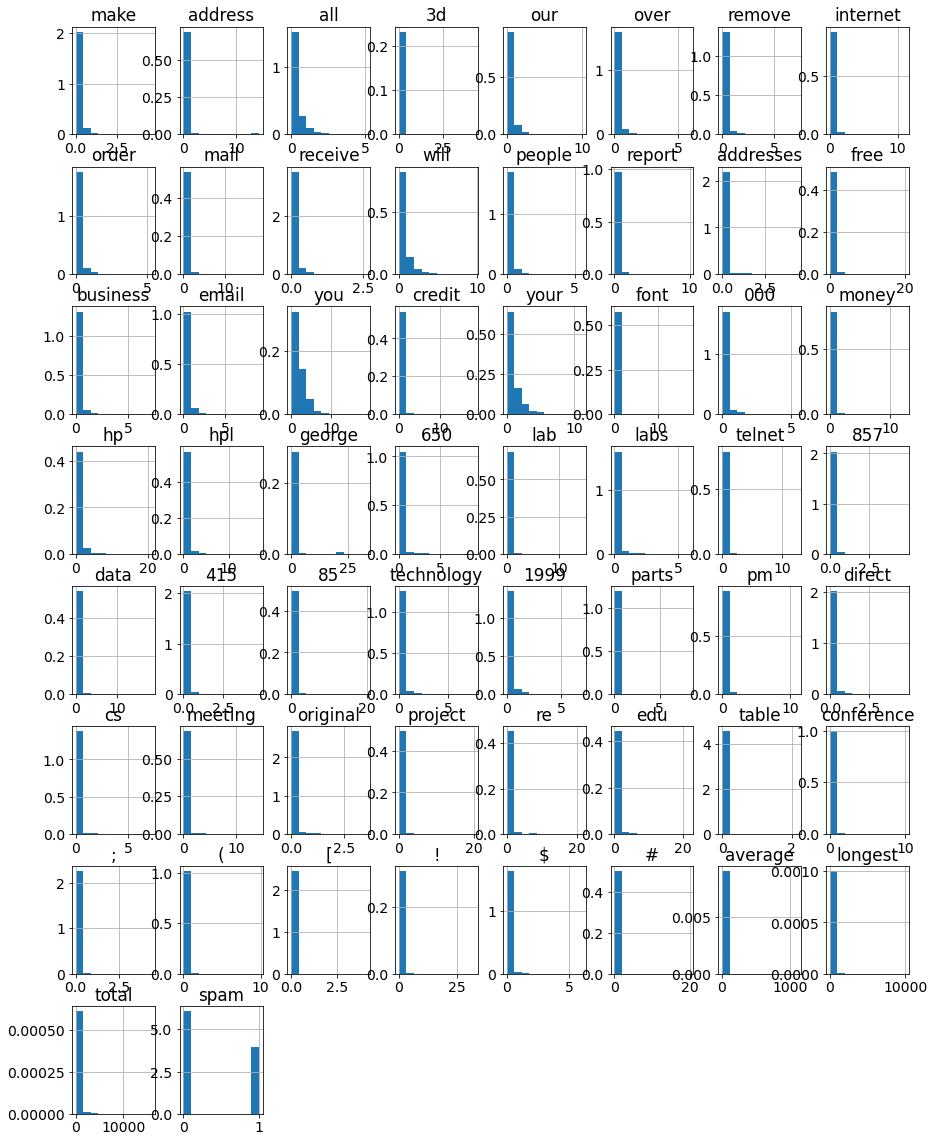

In [484]:
font = {'size'   : 14}

plt.rc('font', **font)
fig = plt.figure(figsize = (15,20))
axe = fig.gca()
                 
wine.hist(ax = axe)

plt.savefig('hist1.png')

fig = plt.figure(figsize = (15,20))
axe = fig.gca()
spam.hist(ax = axe,density = True)

plt.savefig('hist2.png')


Text(0.5, 1.0, 'good vs bad quality')

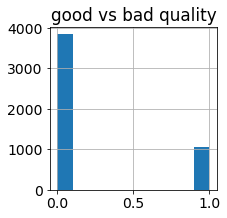

In [485]:
fig = plt.figure(figsize = (3,3))
ax = wine['good_quality'].hist()
ax.set_title( "good vs bad quality")

In [486]:
spam.head()

make  address   all   3d   our  over  remove  internet  order  mail  ...  \
0  0.00     0.64  0.64  0.0  0.32  0.00    0.00      0.00   0.00  0.00  ...   
1  0.21     0.28  0.50  0.0  0.14  0.28    0.21      0.07   0.00  0.94  ...   
2  0.06     0.00  0.71  0.0  1.23  0.19    0.19      0.12   0.64  0.25  ...   
3  0.00     0.00  0.00  0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   
4  0.00     0.00  0.00  0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   

      ;      (    [      !      $      #  average  longest  total  spam  
0  0.00  0.000  0.0  0.778  0.000  0.000    3.756       61    278     1  
1  0.00  0.132  0.0  0.372  0.180  0.048    5.114      101   1028     1  
2  0.01  0.143  0.0  0.276  0.184  0.010    9.821      485   2259     1  
3  0.00  0.137  0.0  0.137  0.000  0.000    3.537       40    191     1  
4  0.00  0.135  0.0  0.135  0.000  0.000    3.537       40    191     1  

[5 rows x 58 columns]

Text(0.5, 1.0, 'quality')

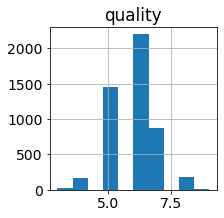

In [487]:
fig = plt.figure(figsize = (3,3))
ax = wine['quality'].hist()
ax.set_title( "quality")

In [488]:
spamX = spam.iloc[: , :-1]
spamY = spam.iloc[: , -1]
scaler = MinMaxScaler()
spamXScaled = scaler.fit_transform(spamX)

wineXScaled = scaler.fit_transform(wineX)

In [489]:
spamXTrain, spamXTest, spamYTrain, spamYTest = splitData(
    spamXScaled,spamY, 0.25)

wineXTrain, wineXTest, wineYTrain, wineYTest = splitData(
    wineXScaled,wineY, 0.25)

# Decision Tree


In [491]:
wineTree = DecisionTreeClassifier(random_state=0)
estimateScore(wineTree,wineXTrain, wineYTrain,wineXTest, wineYTest,'Wine')

Result from DecisionTreeClassifier for Wine:
Train Accuracy: 1.0
Test Accuracy: 0.8228571428571428
Time to fit for: 0.017988920211791992
Time to predict for: 0.0


In [492]:
spamTree = DecisionTreeClassifier(random_state=0)
estimateScore(spamTree,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from DecisionTreeClassifier for spam:
Train Accuracy: 1.0
Test Accuracy: 0.9035621198957429
Time to fit for: 0.06198239326477051
Time to predict for: 0.0010001659393310547


[Text(0.4836340469272258, 0.9736842105263158, 'alcohol <= 0.46\ngini = 0.34\nsamples = 3673\nvalue = [2875, 798]'),
 Text(0.18257178669097537, 0.9210526315789473, 'volatile acidity <= 0.12\ngini = 0.178\nsamples = 2306\nvalue = [2078, 228]'),
 Text(0.04873138863567305, 0.868421052631579, 'alcohol <= 0.169\ngini = 0.367\nsamples = 517\nvalue = [392, 125]'),
 Text(0.009723488301428137, 0.8157894736842105, 'citric acid <= 0.184\ngini = 0.472\nsamples = 68\nvalue = [26, 42]'),
 Text(0.004861744150714068, 0.7631578947368421, 'chlorides <= 0.119\ngini = 0.24\nsamples = 43\nvalue = [6, 37]'),
 Text(0.002430872075357034, 0.7105263157894737, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.007292616226071103, 0.7105263157894737, 'gini = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.014585232452142206, 0.7631578947368421, 'residual sugar <= 0.117\ngini = 0.32\nsamples = 25\nvalue = [20, 5]'),
 Text(0.012154360376785172, 0.7105263157894737, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.0

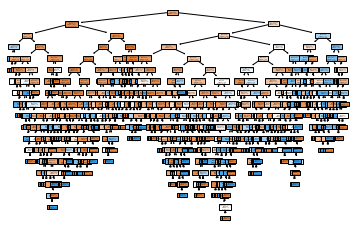

In [353]:
tree.plot_tree(wineTree,filled=True, feature_names =wineHeader)

[Text(0.7970852927965711, 0.9838709677419355, '! <= 0.002\ngini = 0.477\nsamples = 3450\nvalue = [2097, 1353]'),
 Text(0.6709508785791208, 0.9516129032258065, 'remove <= 0.006\ngini = 0.261\nsamples = 1993\nvalue = [1686, 307]'),
 Text(0.6162067677921066, 0.9193548387096774, '$ <= 0.028\ngini = 0.173\nsamples = 1836\nvalue = [1660, 176]'),
 Text(0.5746021094557517, 0.8870967741935484, 'free <= 0.006\ngini = 0.139\nsamples = 1779\nvalue = [1645, 134]'),
 Text(0.5426518099216936, 0.8548387096774194, 'money <= 0.013\ngini = 0.099\nsamples = 1624\nvalue = [1539, 85]'),
 Text(0.5161564395763771, 0.8225806451612904, 'over <= 0.134\ngini = 0.088\nsamples = 1602\nvalue = [1528, 74]'),
 Text(0.49087327571744765, 0.7903225806451613, 'average <= 0.008\ngini = 0.081\nsamples = 1584\nvalue = [1517, 67]'),
 Text(0.45693149409861084, 0.7580645161290323, 'our <= 0.163\ngini = 0.074\nsamples = 1562\nvalue = [1502, 60]'),
 Text(0.43338005379166283, 0.7258064516129032, 'report <= 0.069\ngini = 0.066\nsam

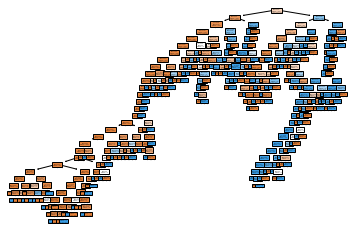

In [345]:
tree.plot_tree(spamTree,filled=True, feature_names =spamHeader)

Text(0.5, 1.0, 'Total Impurity vs effective alpha \n(spam)')

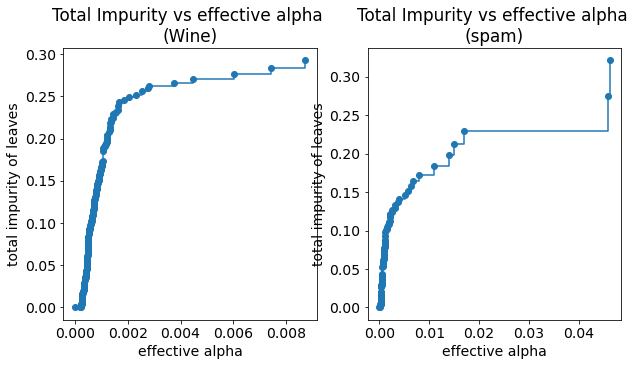

In [493]:
fig, ax = plt.subplots(1, 2 ,figsize = (10,5))

winePath = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(wineXTrain, wineYTrain)
wineCcp_alphas, wineiImpurities = winePath.ccp_alphas, winePath.impurities
ax[0].plot(wineCcp_alphas[:-1], wineiImpurities[:-1], marker="o", drawstyle="steps-post")
ax[0].set_xlabel("effective alpha")
ax[0].set_ylabel("total impurity of leaves")
ax[0].set_title("Total Impurity vs effective alpha \n(Wine)")

spamPath = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(spamXTrain, spamYTrain)
spamCcp_alphas, spamiImpurities = spamPath.ccp_alphas, spamPath.impurities
ax[1].plot(spamCcp_alphas[:-1], spamiImpurities[:-1], marker="o", drawstyle="steps-post")
ax[1].set_xlabel("effective alpha")
ax[1].set_ylabel("total impurity of leaves")
ax[1].set_title("Total Impurity vs effective alpha \n(spam)")

In [494]:
wineClfs = []
for ccp_alpha in wineCcp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(wineXTrain, wineYTrain)
    wineClfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        wineClfs[-1].tree_.max_depth, wineCcp_alphas[-1]
    )
)

spamClfs = []
for ccp_alpha in spamCcp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(spamXTrain, spamYTrain)
    spamClfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        spamClfs[-1].tree_.max_depth, spamCcp_alphas[-1]
    )
)

Number of nodes in the last tree is: 0 with ccp_alpha: 0.04728685881085942
Number of nodes in the last tree is: 0 with ccp_alpha: 0.1551398571601279


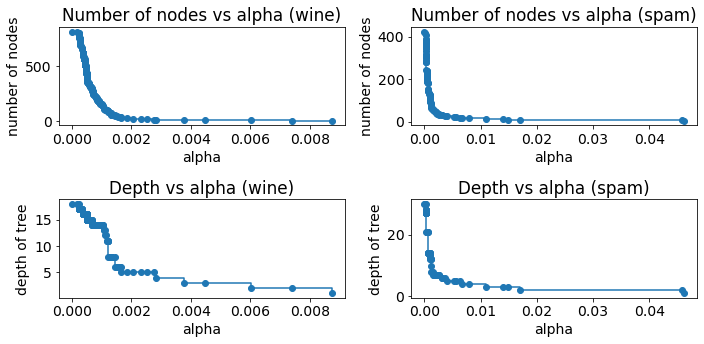

In [495]:

fig, ax = plt.subplots(2, 2, figsize = (10,5))

wineClfs = wineClfs[:-1]
wineCcp_alphas = wineCcp_alphas[:-1]

wineNode_counts = [clf.tree_.node_count for clf in wineClfs]
wineDepth = [clf.tree_.max_depth for clf in wineClfs]
wineScores = []
for clf in wineClfs:
    y_pred = clf.predict(wineXTrain)
    wineScores.append(accuracy_score(y_pred, wineYTrain))

ax[0,0].plot(wineCcp_alphas, wineNode_counts, marker="o", drawstyle="steps-post")
ax[0,0].set_xlabel("alpha")
ax[0,0].set_ylabel("number of nodes")
ax[0,0].set_title("Number of nodes vs alpha (wine)")
ax[1,0].plot(wineCcp_alphas, wineDepth, marker="o", drawstyle="steps-post")
ax[1,0].set_xlabel("alpha")
ax[1,0].set_ylabel("depth of tree")
ax[1,0].set_title("Depth vs alpha (wine)")

spamClfs = spamClfs[:-1]
spamCcp_alphas = spamCcp_alphas[:-1]

spamNode_counts = [clf.tree_.node_count for clf in spamClfs]
spamDepth = [clf.tree_.max_depth for clf in spamClfs]
spamScores = []
for clf in spamClfs:
    y_pred = clf.predict(spamXTrain)
    spamScores.append(accuracy_score(y_pred, spamYTrain))

ax[0,1].plot(spamCcp_alphas, spamNode_counts, marker="o", drawstyle="steps-post")
ax[0,1].set_xlabel("alpha")
ax[0,1].set_ylabel("number of nodes")
ax[0,1].set_title("Number of nodes vs alpha (spam)")
ax[1,1].plot(spamCcp_alphas, spamDepth, marker="o", drawstyle="steps-post")
ax[1,1].set_xlabel("alpha")
ax[1,1].set_ylabel("depth of tree")
ax[1,1].set_title("Depth vs alpha (spam)")

fig.tight_layout()

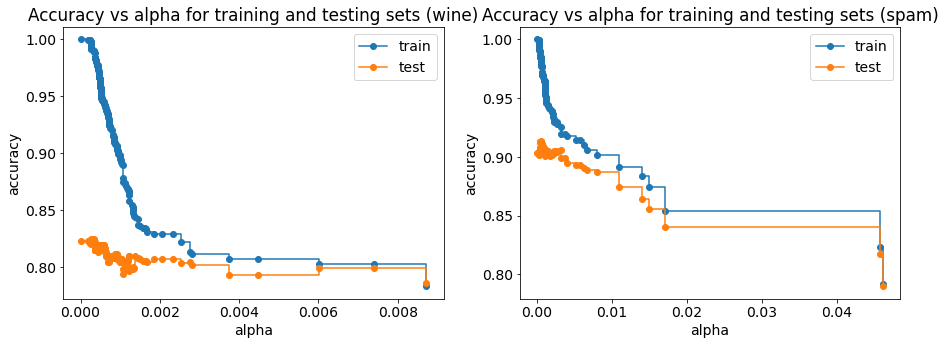

In [496]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

wineTrainScores = [clf.score(wineXTrain, wineYTrain) for clf in wineClfs]
wineTestScores = [clf.score(wineXTest, wineYTest) for clf in wineClfs]

ax[0].set_xlabel("alpha")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy vs alpha for training and testing sets (wine)")
ax[0].plot(wineCcp_alphas, wineTrainScores, marker="o", label="train", drawstyle="steps-post")
ax[0].plot(wineCcp_alphas, wineTestScores, marker="o", label="test", drawstyle="steps-post")
ax[0].legend()

spamTrainScores = [clf.score(spamXTrain, spamYTrain) for clf in spamClfs]
spamTestScores = [clf.score(spamXTest, spamYTest) for clf in spamClfs]

ax[1].set_xlabel("alpha")
ax[1].set_ylabel("accuracy")
ax[1].set_title("Accuracy vs alpha for training and testing sets (spam)")
ax[1].plot(spamCcp_alphas, spamTrainScores, marker="o", label="train", drawstyle="steps-post")
ax[1].plot(spamCcp_alphas, spamTestScores, marker="o", label="test", drawstyle="steps-post")
ax[1].legend()
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

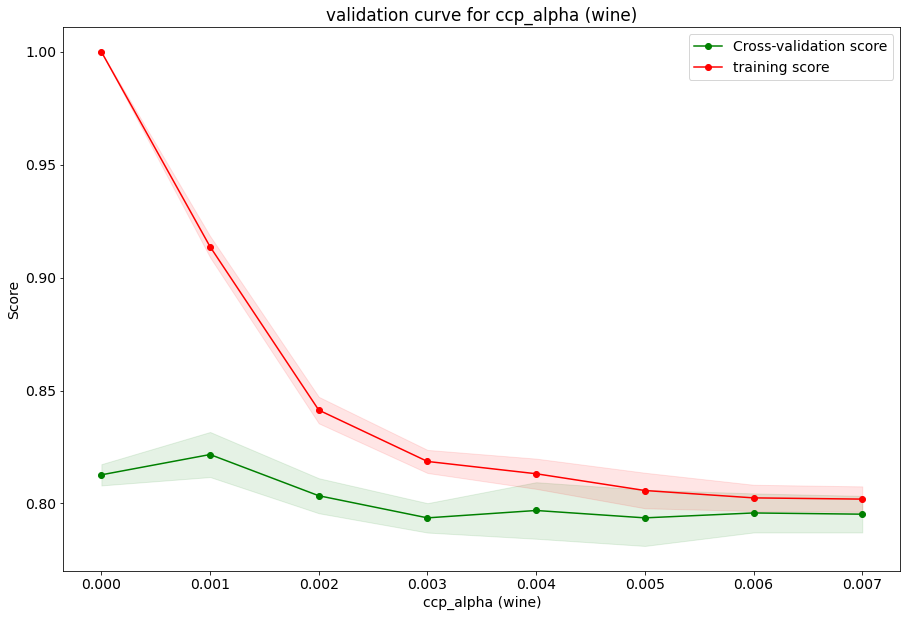

In [405]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(DecisionTreeClassifier() , wineXTrain, wineYTrain, 
                                                                 'ccp_alpha', np.arange(0,.008,.001),  5)
plot_val_curve('ccp_alpha (wine)', np.arange(0,.008,.001),wineTrainScores,wineTrainStds, wineCVScores, wineStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

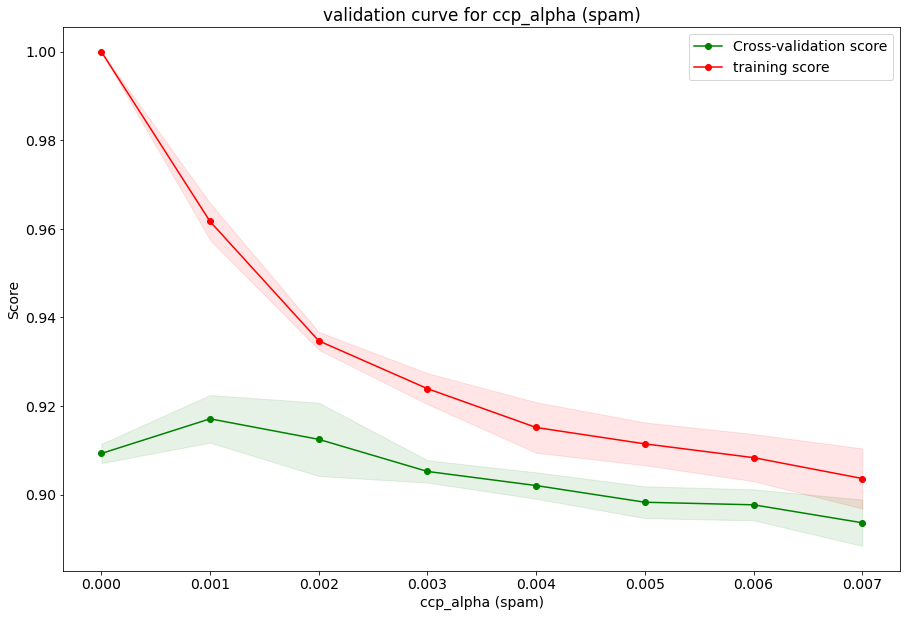

In [404]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(DecisionTreeClassifier() , spamXTrain, spamYTrain, 
                                                                 'ccp_alpha', np.arange(0,.008,.001),  5)
plot_val_curve('ccp_alpha (spam)', np.arange(0,.008,.001),spamTrainScores,spamTrainStds, spamCVScores, spamStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

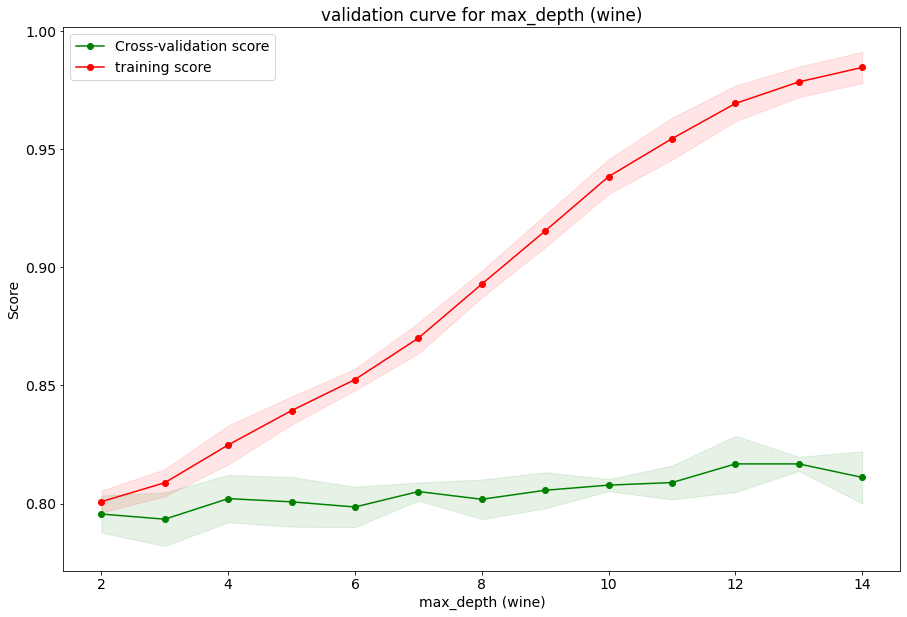

In [399]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(DecisionTreeClassifier() , wineXTrain, wineYTrain, 
                                                                 'max_depth', np.arange(2, 15),  5)
plot_val_curve('max_depth (wine)', np.arange(2, 15),wineTrainScores,wineTrainStds, wineCVScores, wineStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

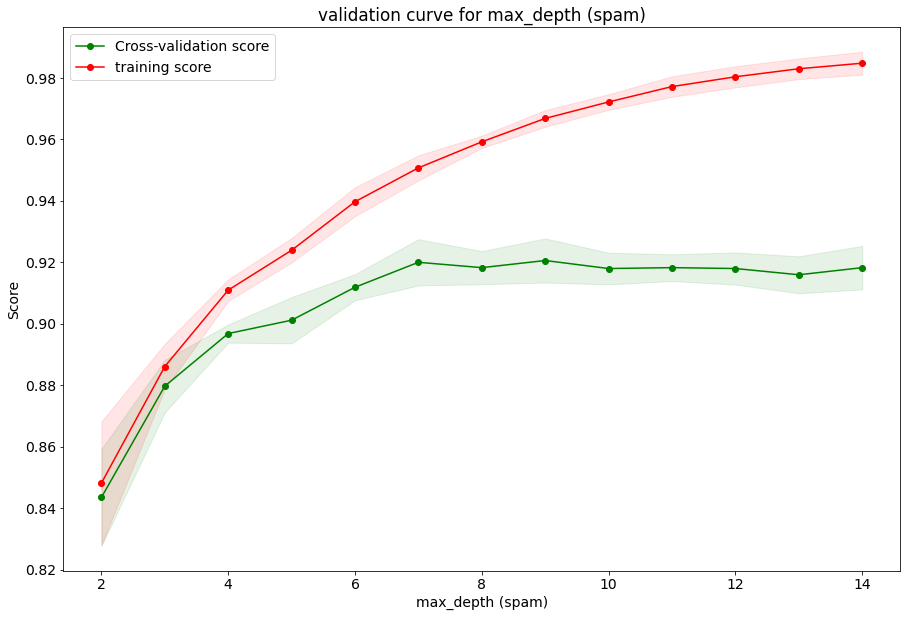

In [400]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(DecisionTreeClassifier() , spamXTrain, spamYTrain, 
                                                                 'max_depth', np.arange(2, 15),  5)
plot_val_curve('max_depth (spam)', np.arange(2, 15),spamTrainScores,spamTrainStds, spamCVScores, spamStds)

In [649]:
wineparam_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 30), 'min_samples_leaf': np.arange(2, 10),
                 'ccp_alpha': np.arange(.0002, .0003)
                 }
spamparam_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 30), 'min_samples_leaf': np.arange(2, 10)}

In [650]:
wineGrid = gridSearch(wineXTrain, wineYTrain,DecisionTreeClassifier(ccp_alpha=.003),wineparam_grid, 5 )
spamGrid = gridSearch(spamXTrain, spamYTrain,DecisionTreeClassifier(ccp_alpha=.003),spamparam_grid, 5 )

In [651]:
wineGrid.fit(wineXTrain,wineYTrain)
print('Best Hyperparameter for Wine:')
print(wineGrid.best_params_)

Best Hyperparameter for Wine:
{'ccp_alpha': 0.0002, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2}


In [652]:

spamGrid.fit(wineXTrain,wineYTrain)
print('Best Hyperparameter for spam:')
print(spamGrid.best_estimator_)


Best Hyperparameter for spam:
DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', max_depth=13,
                       min_samples_leaf=2)


In [653]:
estimateScore(wineGrid.best_estimator_,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')


Result from DecisionTreeClassifier for wine:
Train Accuracy: 0.9716852708957255
Test Accuracy: 0.8024489795918367
Time to fit for: 0.02502155303955078
Time to predict for: 0.0


In [654]:
estimateScore(spamGrid.best_estimator_,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')


Result from DecisionTreeClassifier for spam:
Train Accuracy: 0.9365217391304348
Test Accuracy: 0.9087749782797567
Time to fit for: 0.05100250244140625
Time to predict for: 0.0009999275207519531


0.8065850340136055


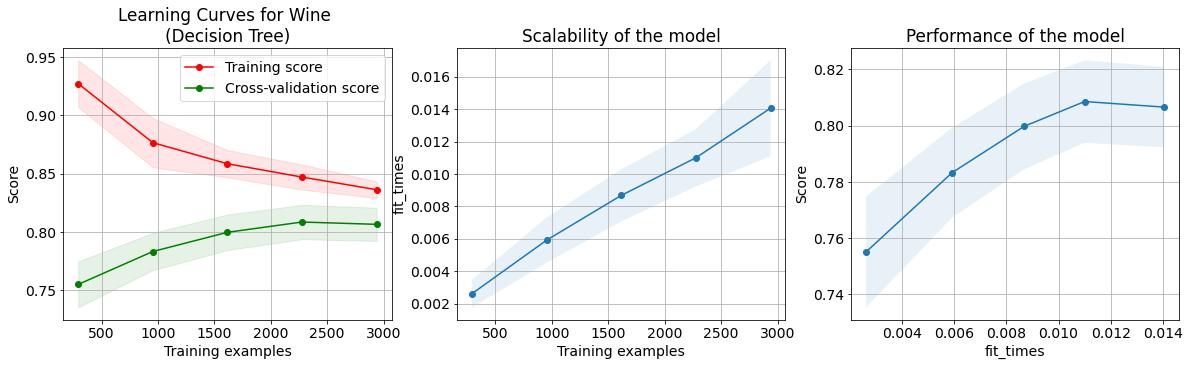

In [310]:
CV = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

title = "Learning Curves for Decision Tree \nwine"


estimator = wineGrid.best_estimator_.set_params(random_state=0)
plot_learning_curve(
    estimator,
    'wine',
    wineXTrain,
    wineYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()

0.863507246376812


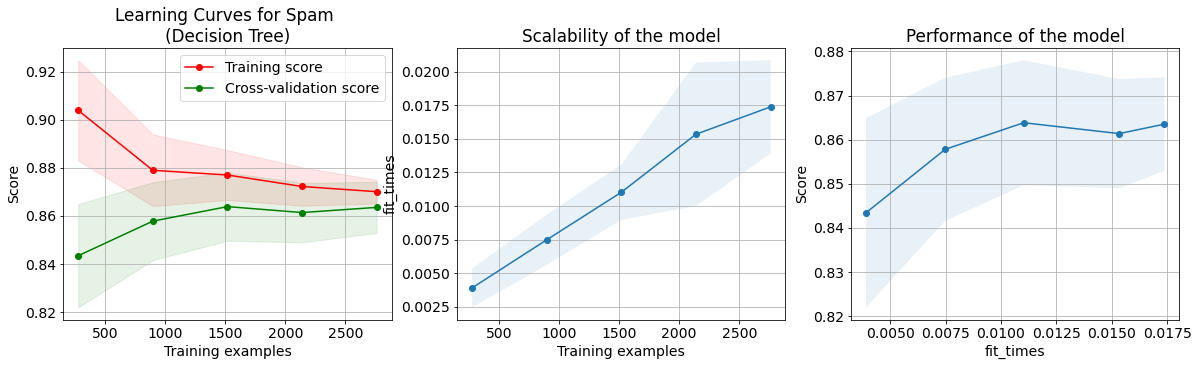

In [407]:
X, y = spamXTrain, spamYTrain

title = "Learning Curves for Spam \n(Decision Tree)"


estimator = spamGrid.best_estimator_.set_params(random_state=0)
plot_learning_curve(
    estimator,
    'spam',
    spamXTrain,
    spamYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()

# Ada Boost

In [710]:
wineAda = AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha = .003, max_depth = 7))
estimateScore(wineAda, wineXTrain,wineYTrain,wineXTest,wineYTest,'wine')

Result from AdaBoostClassifier for wine:
Train Accuracy: 0.8793901442962156
Test Accuracy: 0.8081632653061225
Time to fit for: 0.5979998111724854
Time to predict for: 0.012994527816772461


In [711]:
spamAda = AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha = .003, max_depth = 7))
estimateScore(spamAda, spamXTrain,spamYTrain,spamXTest,spamYTest,'spam')

Result from AdaBoostClassifier for spam:
Train Accuracy: 1.0
Test Accuracy: 0.9391833188531712
Time to fit for: 1.319019079208374
Time to predict for: 0.01899576187133789


<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

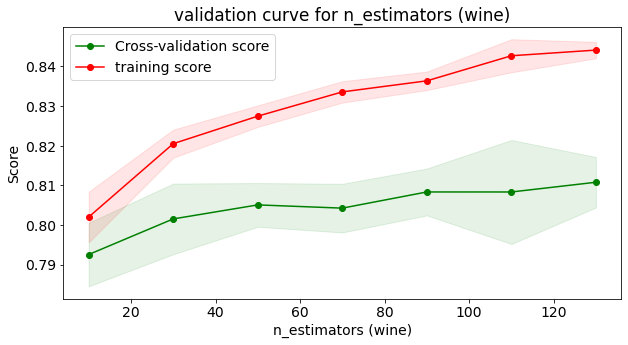

In [712]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(AdaBoostClassifier() , wineXTrain, wineYTrain, 
                                                                 'n_estimators', np.arange(10,150,20),  5)
plot_val_curve('n_estimators (wine)', np.arange(10,150,20),wineTrainScores,wineTrainStds, wineCVScores, wineStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

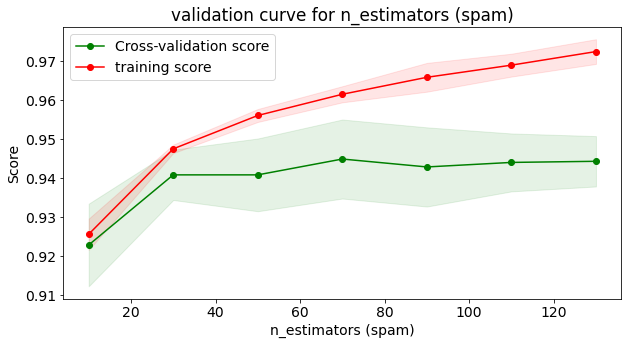

In [713]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(AdaBoostClassifier() , spamXTrain, spamYTrain, 
                                                                 'n_estimators', np.arange(10,150,20),  5)
plot_val_curve('n_estimators (spam)', np.arange(10,150,20),spamTrainScores,spamTrainStds, spamCVScores, spamStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

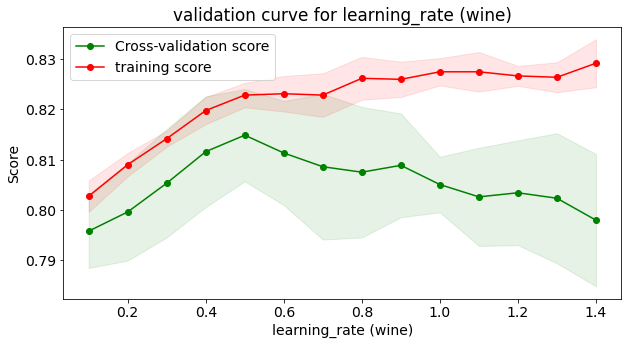

In [714]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(AdaBoostClassifier() , wineXTrain, wineYTrain, 
                                                                 'learning_rate', np.arange(.1,1.5,.1),  5)
plot_val_curve('learning_rate (wine)',np.arange(.1,1.5,.1),wineTrainScores,wineTrainStds, wineCVScores, wineStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

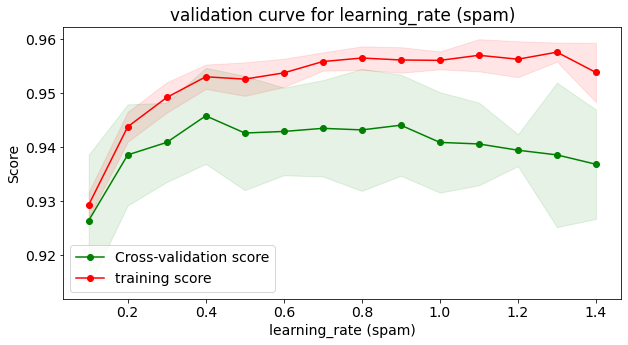

In [715]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(AdaBoostClassifier() , spamXTrain, spamYTrain, 
                                                                 'learning_rate', np.arange(.1,1.5,.1),  5)
plot_val_curve('learning_rate (spam)',np.arange(.1,1.5,.1),spamTrainScores,spamTrainStds, spamCVScores, spamStds)

In [716]:
param_grid = {'n_estimators': np.arange(50,150,20),
                  'learning_rate': np.arange(.1,1.5,.1)}


In [717]:
wineGrid = gridSearch(wineXTrain, wineYTrain,wineAda,param_grid, 5 )
wineGrid.fit(wineXTrain,wineYTrain)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.003,
                                                                                max_depth=7),
                                          random_state=0),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4]),
                         'n_estimators': array([ 50,  70,  90, 110, 130])},
             scoring='accuracy')

In [718]:
print('Best Hyperparameter for Wine:')
print(wineGrid.best_params_)

Best Hyperparameter for Wine:
{'learning_rate': 1.3000000000000003, 'n_estimators': 110}


In [719]:
spamGrid = gridSearch(spamXTrain, spamYTrain,spamAda,param_grid, 5 )
spamGrid.fit(wineXTrain,wineYTrain)

KeyboardInterrupt: 

In [ ]:
print('Best Hyperparameter for Wine:')
print(spamGrid.best_params_)

In [ ]:
estimateScore(wineGrid.best_estimator_,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

In [ ]:
estimateScore(spamGrid.best_estimator_,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

In [ ]:

plot_learning_curve(
    wineGrid.best_estimator_,
    'wine',
    wineXTrain,
    wineYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()

In [ ]:
plot_learning_curve(
    spamGrid.best_estimator_,
    'spam',
    spamXTrain,
    spamYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()

# K-Nearest Neighbor

In [315]:
wineKNN= KNeighborsClassifier()
estimateScore(wineKNN,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

In [316]:
spamKNN= KNeighborsClassifier()
estimateScore(spamKNN,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Train Accuracy 0.9295652173913044
Test Accuracy 0.8922675933970461


<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

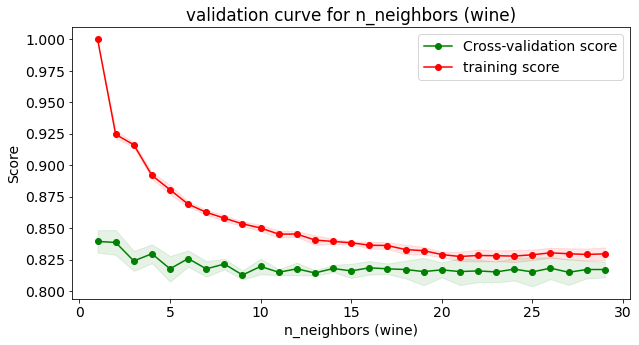

In [547]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(KNeighborsClassifier() , wineXTrain, wineYTrain, 
                                                                 'n_neighbors', np.arange(1, kNeighbor),  5)
plot_val_curve('n_neighbors (wine)', np.arange(1, kNeighbor),wineTrainScores,wineTrainStds, wineCVScores, wineStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

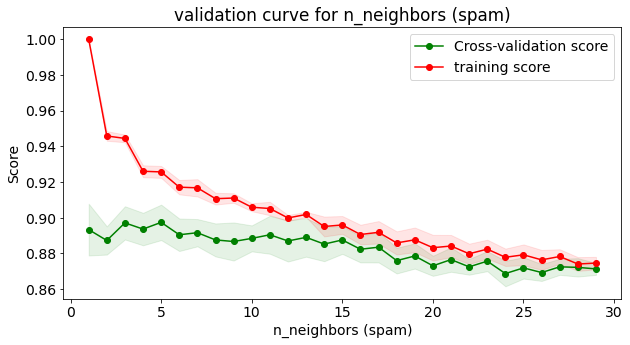

In [548]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(KNeighborsClassifier() , spamXTrain, spamYTrain, 
                                                                 'n_neighbors', np.arange(1, kNeighbor),  5)
plot_val_curve('n_neighbors (spam)', np.arange(1, kNeighbor),spamTrainScores,spamTrainStds, spamCVScores, spamStds)

In [317]:
paramGridKNN = {'weights': ['uniform', 'distance'] ,
         'n_neighbors': np.arange(2, 30)}
kNeighbor = 30

In [546]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(KNeighborsClassifier(n_neighbors=5) , wineXTrain, wineYTrain, 
                                                                 'weights', ['uniform', 'distance'],  5)
plot_val_curve('weights', np.array(['uniform', 'distance']),wineTrainScores,wineTrainStds, wineCVScores, wineStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

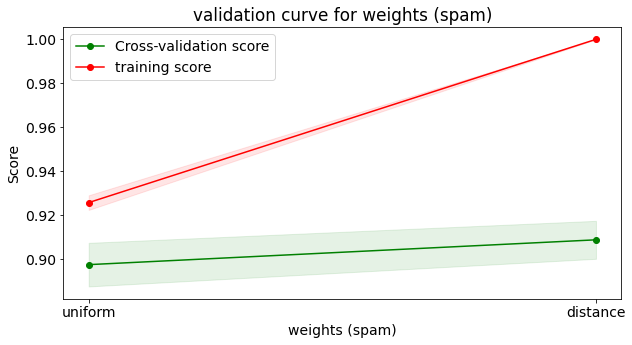

In [599]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(KNeighborsClassifier(n_neighbors=5) , spamXTrain, spamYTrain, 
                                                                 'weights', ['uniform', 'distance'],  5)
plot_val_curve('weights (spam)', ['uniform', 'distance'],spamTrainScores,spamTrainStds, spamCVScores, spamStds)

In [ ]:
'n_neighbors', np.arange(1, kNeighbor)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

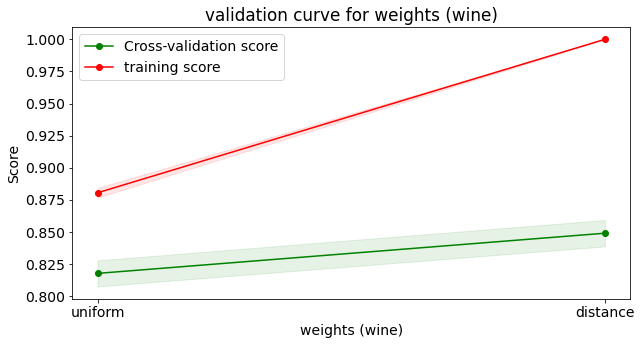

In [598]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(KNeighborsClassifier(n_neighbors=5) , wineXTrain, wineYTrain, 
                                                                 'weights', ['uniform', 'distance'],  5)
plot_val_curve('weights (wine)', ['uniform', 'distance'],wineTrainScores,wineTrainStds, wineCVScores, wineStds)

In [553]:
param_grid = {'n_neighbors': np.arange(1, kNeighbor),
                 'weights': ['uniform', 'distance']
                 
                 }

In [588]:
wineGrid = gridSearch(wineXTrain, wineYTrain,KNeighborsClassifier(),param_grid, 5 )

In [589]:
wineGrid.fit(wineXTrain, wineYTrain)
print('Best Hyperparameter for Wine:')
print(wineGrid.best_params_)


Best Hyperparameter for Wine:
{'n_neighbors': 26, 'weights': 'distance'}


In [590]:
spamGrid = gridSearch(spamXTrain, spamYTrain,KNeighborsClassifier(),param_grid, 5 )

In [591]:
spamGrid.fit(spamXTrain, spamYTrain)
print('Best Hyperparameter for spam:')
print(spamGrid.best_params_)


Best Hyperparameter for spam:
{'n_neighbors': 16, 'weights': 'distance'}


In [592]:
estimateScore(wineGrid.best_estimator_,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

Result from KNeighborsClassifier for wine:
Train Accuracy: 1.0
Test Accuracy: 0.8661224489795918
Time to fit for: 0.008002281188964844
Time to predict for: 0.07100200653076172


In [593]:
estimateScore(spamGrid.best_estimator_,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from KNeighborsClassifier for spam:
Train Accuracy: 1.0
Test Accuracy: 0.9052997393570807
Time to fit for: 0.0020112991333007812
Time to predict for: 0.041001081466674805


0.8650340136054421


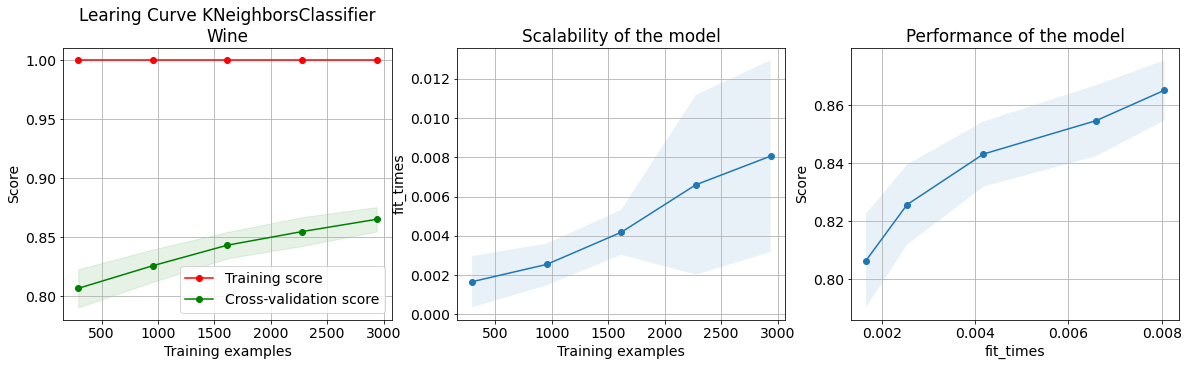

In [596]:

plot_learning_curve(wineGrid.best_estimator_,"Wine",wineXTrain,wineYTrain,axes=None,ylim=None,cv=CV,n_jobs=4,scoring='accuracy',)
plt.show()

0.9065217391304341


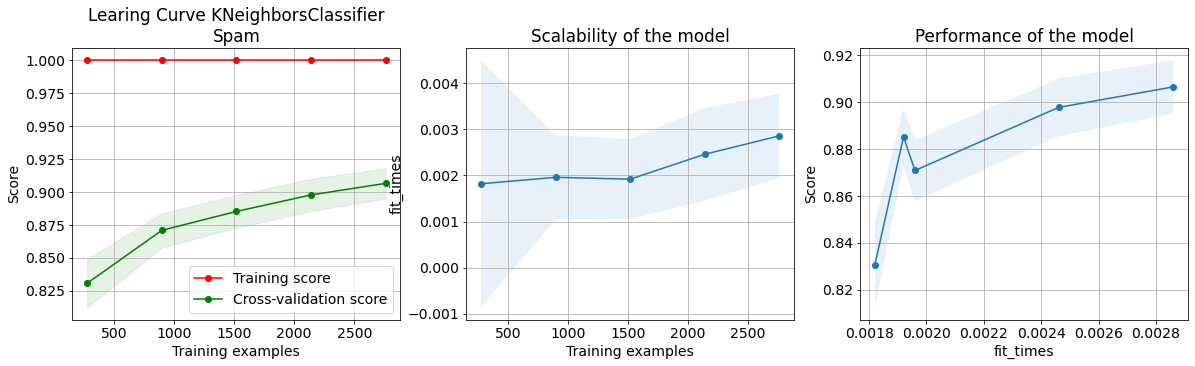

In [597]:
plot_learning_curve(spamGrid.best_estimator_,"Spam",spamXTrain,spamYTrain,axes=None,ylim=None,cv=CV,n_jobs=4,scoring='accuracy',)
plt.show()

# Support Vector Machine

In [689]:
wineSVM= SVC()
estimateScore(wineSVM,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')


Result from SVC for wine:
Train Accuracy: 0.8233052001089028
Test Accuracy: 0.8114285714285714
Time to fit for: 0.44698357582092285
Time to predict for: 0.23099660873413086


In [691]:
spamSVM= SVC()
estimateScore(wineSVM,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from SVC for spam:
Train Accuracy: 0.946376811594203
Test Accuracy: 0.9252823631624674
Time to fit for: 0.29798364639282227
Time to predict for: 0.15400004386901855


In [331]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

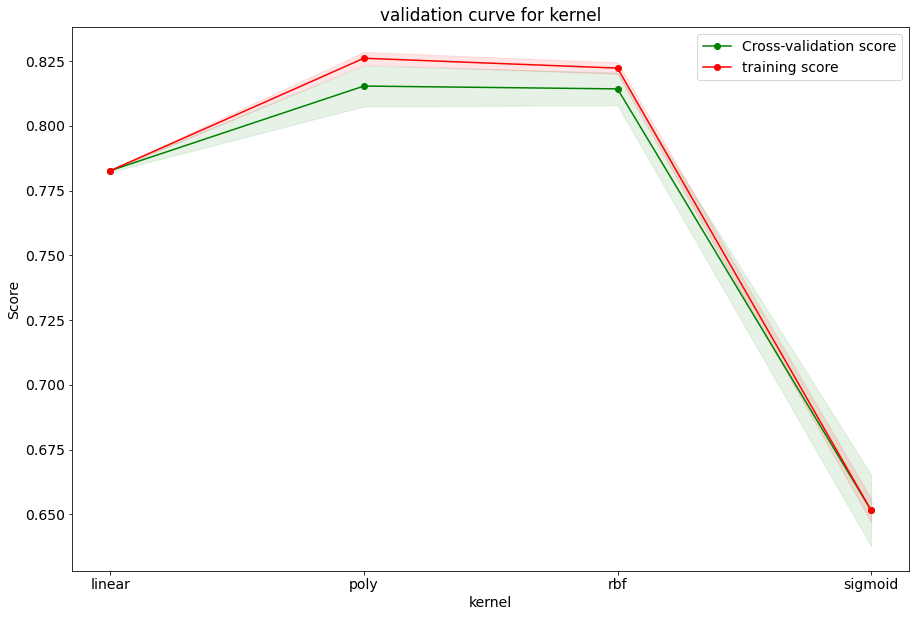

In [332]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(SVC() , wineXTrain, wineYTrain, 
                                                                 'kernel', ['linear', 'poly', 'rbf', 'sigmoid'],  5)
plot_val_curve('kernel', ['linear', 'poly', 'rbf', 'sigmoid'],wineTrainScores,wineTrainStds, wineCVScores, wineStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

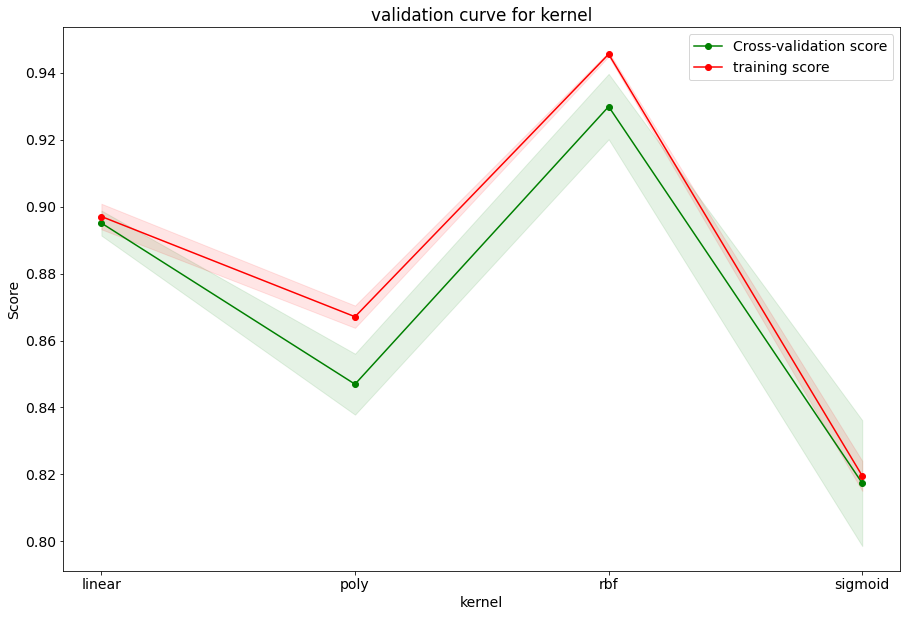

In [333]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(SVC() , spamXTrain, spamYTrain, 
                                                                 'kernel', ['linear', 'poly', 'rbf', 'sigmoid'],  5)
plot_val_curve('kernel', ['linear', 'poly', 'rbf', 'sigmoid'],spamTrainScores,spamTrainStds, spamCVScores, spamStds)

In [336]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(SVC(kernel = 'poly') , wineXTrain, wineYTrain, 
                                                                 'degree', [2,3,4,5,6,7],  5)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

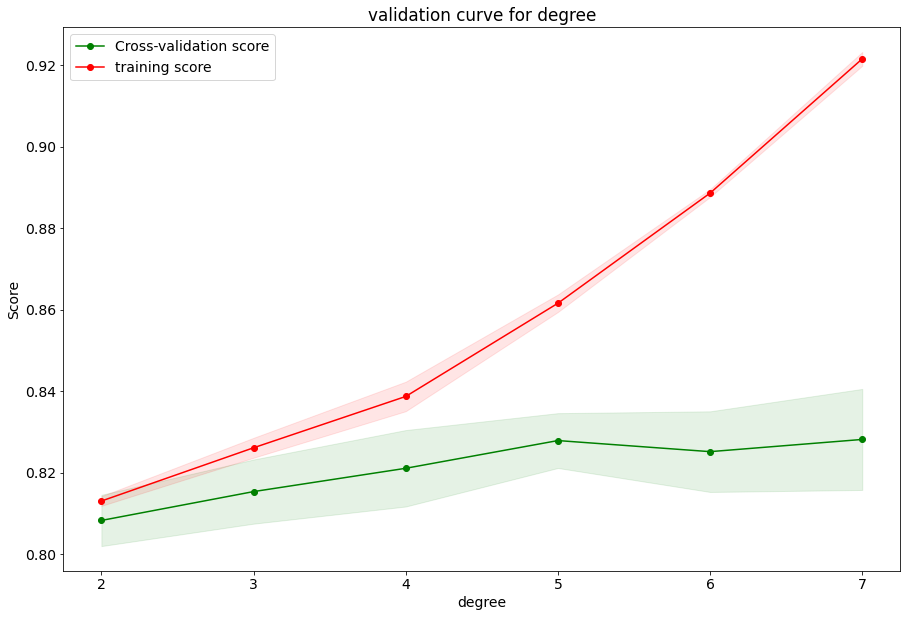

In [337]:
plot_val_curve('degree', [2,3,4,5,6,7],wineTrainScores,wineTrainStds, wineCVScores, wineStds)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

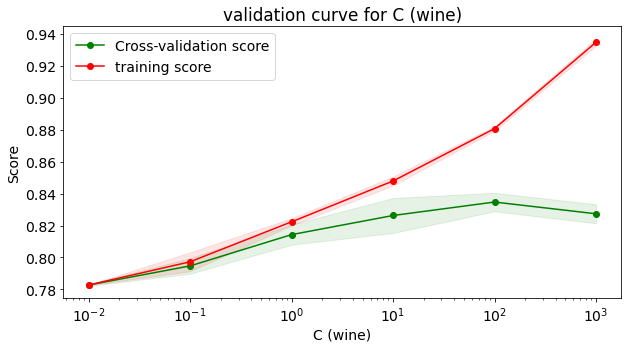

In [611]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(SVC() , wineXTrain, wineYTrain, 
                                                                 'C', [.01, .1, 1,10,100,1000],  5)
plot_val_curve('C (wine)', [.01, .1, 1,10,100,1000],wineTrainScores,wineTrainStds, wineCVScores, wineStds, log =True)

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

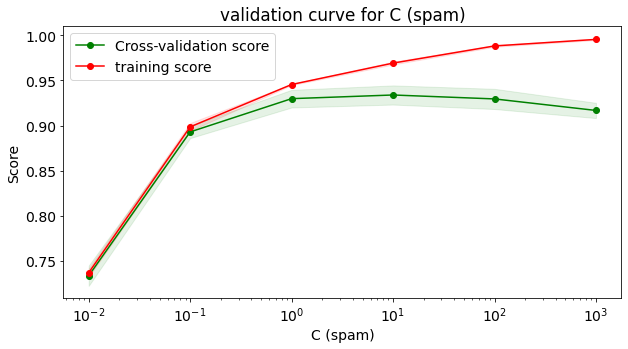

In [612]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(SVC() , spamXTrain, spamYTrain, 
                                                                 'C', [.01, .1, 1,10,100,1000],  5)
plot_val_curve('C (spam)', [.01, .1, 1,10,100,1000],spamTrainScores,spamTrainStds, spamCVScores, spamStds, log =True)

In [664]:
wineparam_grid = { 'C':[1,10,100],'gamma': [1],'kernel': ['rbf','poly']}
spamparam_grid = { 'C':[.1, 1,10,100],'gamma':  [1,0.1,0.01,0.001],
                  'kernel': ['rbf','poly','linear']}

In [657]:
wineSVM= SVC()

In [658]:
spamSVM= SVC()

In [659]:
wineGrid = gridSearch(wineXTrain, wineYTrain,wineSVM,wineparam_grid, 5 )


In [665]:
spamGrid = gridSearch(spamXTrain, spamYTrain,spamSVM,spamparam_grid, 5 )

In [660]:
wineGrid.fit(wineXTrain,wineYTrain)
print('Best Hyperparameter for Wine:')
print(wineGrid.best_estimator_)

Best Hyperparameter for Wine:
SVC(C=100, gamma=1)


0.95072463768116


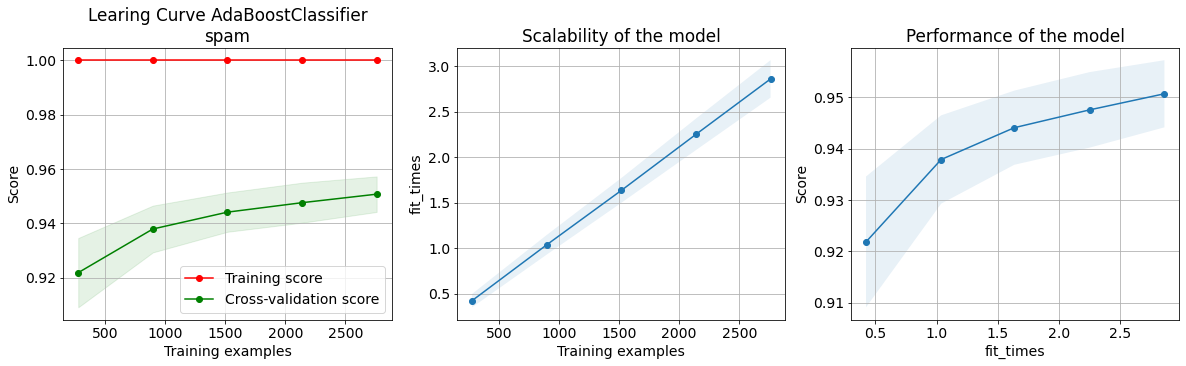

In [539]:
plot_learning_curve(
    spamGrid.best_estimator_,
    'spam',
    spamXTrain,
    spamYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()

In [661]:
print('Best Hyperparameter for Wine:')
print(wineGrid.best_params_)

Best Hyperparameter for Wine:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [666]:
spamGrid.fit(spamXTrain,spamYTrain)
print('Best Hyperparameter for spam:')
print(spamGrid.best_params_)

Best Hyperparameter for spam:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [663]:
print('Best Hyperparameter for Wine:')
print(spamGrid.best_estimator_)

Best Hyperparameter for Wine:
DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', max_depth=13,
                       min_samples_leaf=2, random_state=0)


In [662]:
estimateScore(wineGrid.best_estimator_,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')


Result from SVC for wine:
Train Accuracy: 0.8399128777566023
Test Accuracy: 0.8146938775510204
Time to fit for: 0.6009964942932129
Time to predict for: 0.20400047302246094


In [634]:
estimateScore(spamGrid.best_estimator_,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')


Result from SVC for spam:
Train Accuracy: 0.9626086956521739
Test Accuracy: 0.9348392701998263
Time to fit for: 0.3429837226867676
Time to predict for: 0.093017578125


0.8231836734693876


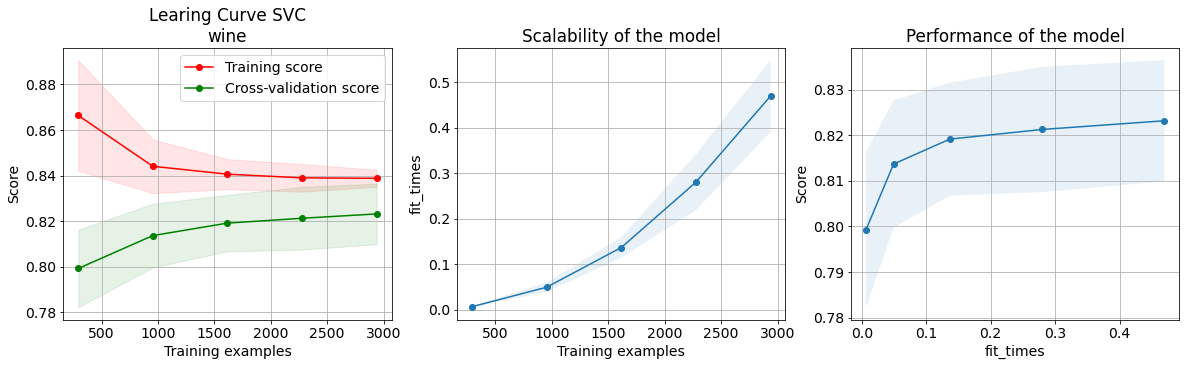

In [667]:
plot_learning_curve(
    wineGrid.best_estimator_,
    'wine',
    wineXTrain,
    wineYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()

0.9350434782608694


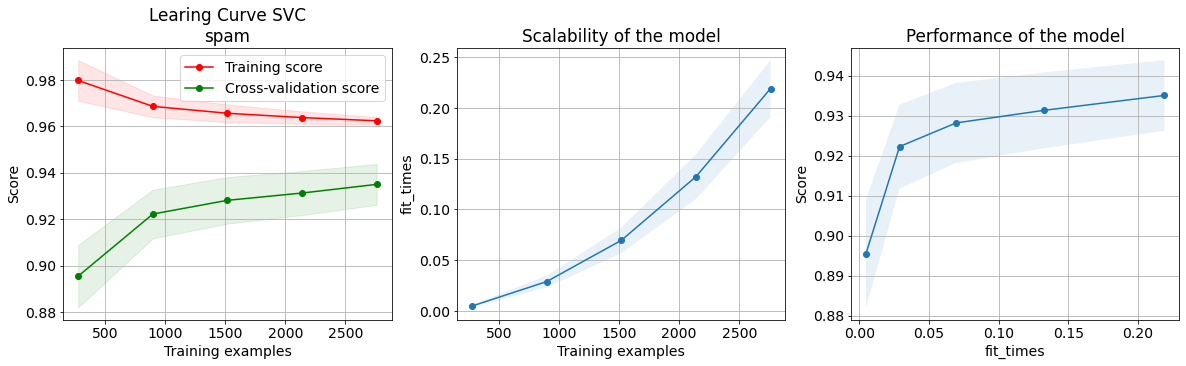

In [668]:
plot_learning_curve(
    spamGrid.best_estimator_,
    'spam',
    spamXTrain,
    spamYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()

# Neural Network

In [670]:
wineNN = MLPClassifier(hidden_layer_sizes = 2)

In [671]:
spamNN = MLPClassifier(hidden_layer_sizes = 2)

In [672]:
estimateScore(wineNN,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

Result from MLPClassifier for wine:
Train Accuracy: 0.802885924312551
Test Accuracy: 0.796734693877551
Time to fit for: 1.0389988422393799
Time to predict for: 0.0010008811950683594


C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [674]:
estimateScore(spamNN,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from MLPClassifier for spam:
Train Accuracy: 0.922608695652174
Test Accuracy: 0.9018245004344049
Time to fit for: 1.1430160999298096
Time to predict for: 0.0


C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

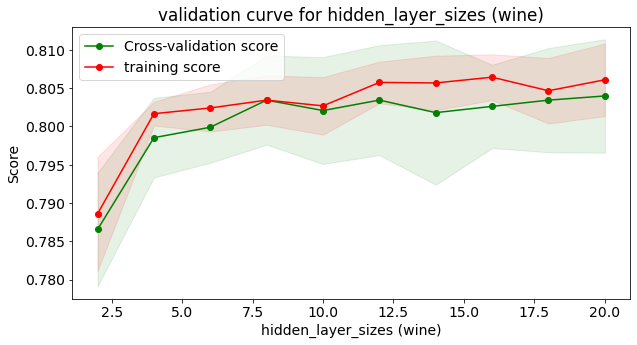

In [682]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(MLPClassifier() , wineXTrain, wineYTrain, 
                                                                 'hidden_layer_sizes', np.arange(2,22,2),  5)
plot_val_curve('hidden_layer_sizes (wine)', np.arange(2,22,2),wineTrainScores,wineTrainStds, wineCVScores, wineStds)

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

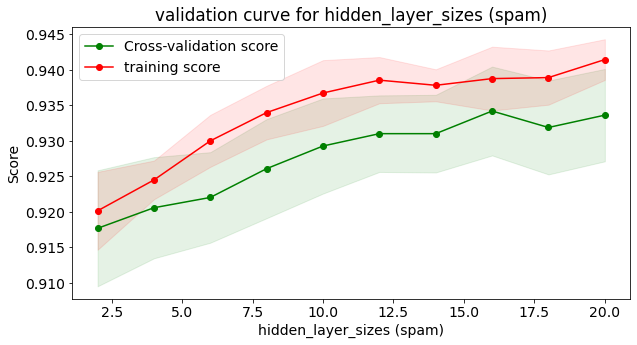

In [683]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(MLPClassifier() , spamXTrain, spamYTrain, 
                                                                 'hidden_layer_sizes', np.arange(2,22,2),  5)
plot_val_curve('hidden_layer_sizes (spam)', np.arange(2,22,2),spamTrainScores,spamTrainStds, spamCVScores, spamStds)

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

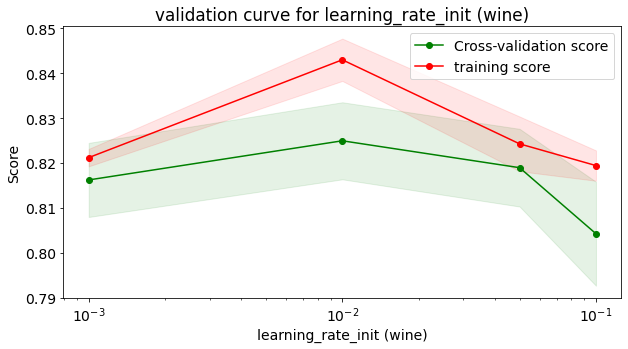

In [679]:
wineTrainScores,wineTrainStds, wineCVScores, wineStds = val_curve(MLPClassifier() , wineXTrain, wineYTrain, 
                                                                 'learning_rate_init', [.001, 0.01, 0.05, .1],  5)
plot_val_curve('learning_rate_init (wine)',[.001, 0.01, 0.05, .1],wineTrainScores,wineTrainStds, wineCVScores, wineStds, log=True)

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

<module 'matplotlib.pyplot' from 'C:\\Users\\Luan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

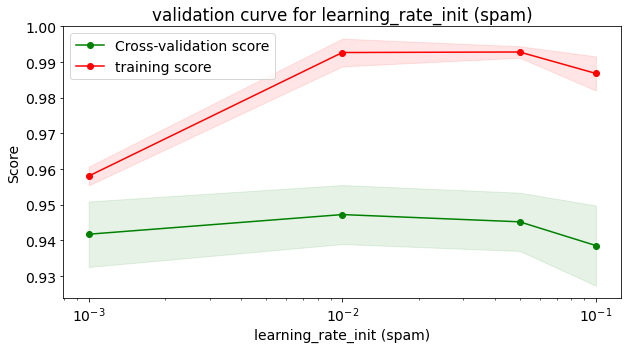

In [680]:
spamTrainScores,spamTrainStds, spamCVScores, spamStds = val_curve(MLPClassifier() , spamXTrain, spamYTrain, 
                                                                 'learning_rate_init', [.001, 0.01, 0.05, .1],  5)
plot_val_curve('learning_rate_init (spam)',[.001, 0.01, 0.05, .1],spamTrainScores,spamTrainStds, spamCVScores, spamStds, log=True)

In [686]:
wineparam_grid = {'hidden_layer_sizes': np.arange(2,22,2),
'learning_rate_init': [.001, 0.01, 0.05, .1]}
spamparam_grid = {'hidden_layer_sizes': np.arange(2,22,2),
'learning_rate_init': [.001, 0.01, 0.05, .1]}

In [687]:
wineGrid = gridSearch(wineXTrain, wineYTrain,MLPClassifier(),wineparam_grid, 5 )
spamGrid = gridSearch(spamXTrain, spamYTrain,MLPClassifier(),spamparam_grid, 5 )

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [688]:
wineGrid.fit(wineXTrain,wineYTrain)
print('Best Hyperparameter for Wine:')
print(wineGrid.best_params_)

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Best Hyperparameter for Wine:
{'hidden_layer_sizes': 20, 'learning_rate_init': 0.01}


C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [692]:
spamGrid.fit(spamXTrain,spamYTrain)
print('Best Hyperparameter for spam:')
print(spamGrid.best_params_)

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Luan\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Best Hyperparameter for spam:
{'hidden_layer_sizes': 8, 'learning_rate_init': 0.1}


In [707]:
estimateScore(wineGrid.best_estimator_,wineXTrain, wineYTrain,wineXTest, wineYTest,'wine')

Result from MLPClassifier for wine:
Train Accuracy: 0.8276613122787911
Test Accuracy: 0.8163265306122449
Time to fit for: 1.344998836517334
Time to predict for: 0.0009999275207519531


In [706]:

estimateScore(spamGrid.best_estimator_,spamXTrain, spamYTrain,spamXTest, spamYTest,'spam')

Result from MLPClassifier for spam:
Train Accuracy: 0.9611594202898551
Test Accuracy: 0.9252823631624674
Time to fit for: 0.31398534774780273
Time to predict for: 0.0


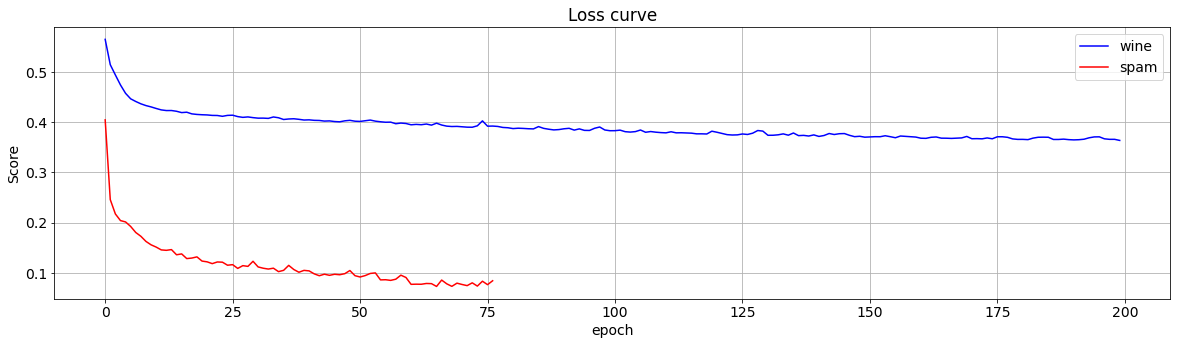

In [702]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
axes.set_xlabel("epoch")
axes.set_ylabel("Loss")
axes.set_title("Loss curve" )
axes.grid()
axes.plot(wineGrid.best_estimator_.loss_curve_, color="b", label="wine")
axes.plot(spamGrid.best_estimator_.loss_curve_, color="r", label="spam")
axes.legend(loc="best")

0.8155918367346939


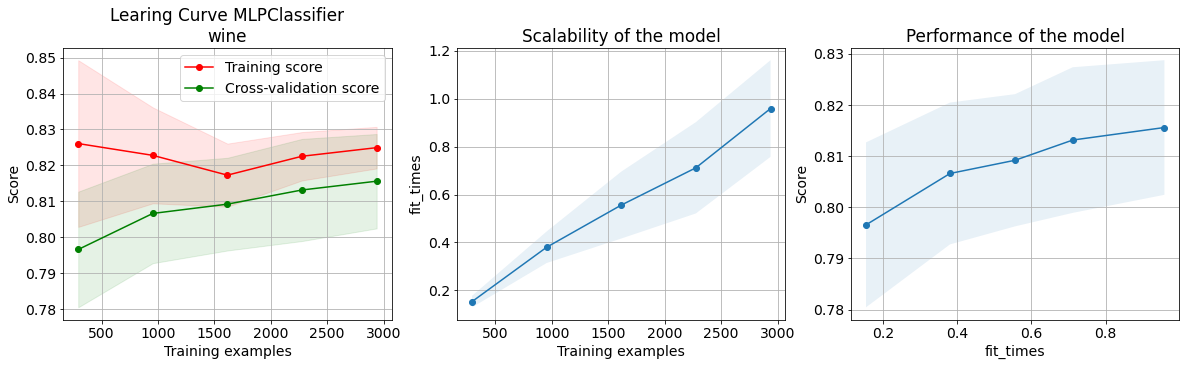

In [704]:
estimator = wineGrid.best_estimator_.set_params(random_state=0)
plot_learning_curve(
    estimator,
    'wine',
    wineXTrain,
    wineYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()

0.9383478260869564


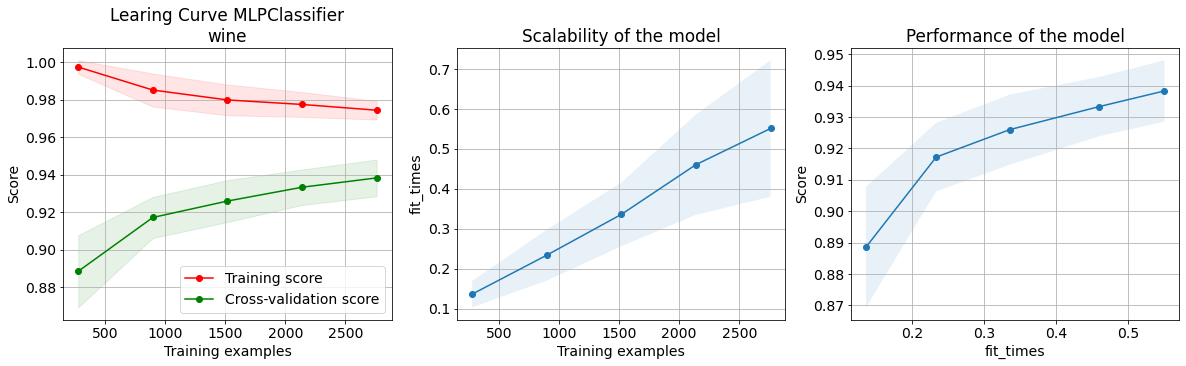

In [705]:
estimator = spamGrid.best_estimator_.set_params(random_state=0)
plot_learning_curve(
    estimator,
    'wine',
    spamXTrain,
    spamYTrain,
    axes=None,
    ylim=None,
    cv=CV,
    n_jobs=4,
    scoring='accuracy',
)


plt.show()